In [ ]:
import pandas as pd

In [ ]:
df_hotel = pd.read_csv('hotel_bookings.csv')

In [ ]:
df_hotel.head()

,city,room_price,number_of_nights
0,Houston,147,3
1,Miami,247,7
2,Chicago,444,2
3,Miami,289,2
4,Miami,193,7


### To calculate the revenue generated by each city

In [ ]:
df_hotel['Revenue'] = df_hotel['room_price'] * df_hotel['number_of_nights']

In [ ]:
revenue_by_city = df_hotel.groupby('city')['Revenue'].sum()

In [ ]:
revenue_by_city

,Revenue
city,
Chicago,51467
Houston,62625
Los Angeles,43513
Miami,53663
New York,56076


### To find the city with the highest growth in bookings month-over-month

In [ ]:
df_booking = pd.read_csv('booking_growth.csv')

In [ ]:
df_booking.head()

,city,booking_date,number_of_bookings
0,New York,2024-02-24,17
1,Miami,2024-12-24,44
2,Los Angeles,2024-05-10,28
3,Houston,2024-10-14,29
4,Miami,2024-09-22,21


In [ ]:
df_booking['booking_date'] = pd.to_datetime(df_booking['booking_date'])
df_booking['month'] = df_booking['booking_date'].dt.month

In [ ]:
monthly_bookings = (
    df_booking.groupby(['city', 'month'], as_index=False)['number_of_bookings']
    .sum()
    .rename(columns={'number_of_bookings': 'total_bookings'})
)

In [ ]:
monthly_bookings['growth'] = monthly_bookings.groupby('city')['total_bookings'].pct_change()

In [ ]:
highest_growth = monthly_bookings.loc[monthly_bookings['growth'].idxmax()]

print("City with highest MoM growth:")
print(highest_growth)

City with highest MoM growth:
city              Los Angeles
month                       6
total_bookings            315
growth                2.28125
Name: 29, dtype: object


### To calculate the percentage of cancellations for each property

In [ ]:
df_cancel = pd.read_csv('cancellations.csv')

In [ ]:
df_cancel

,property_id,booking_status
0,P17,confirmed
1,P10,confirmed
2,P10,cancelled
3,P4,confirmed
4,P20,cancelled
...,...,...
295,P17,confirmed
296,P9,cancelled
297,P9,cancelled
298,P1,cancelled


In [ ]:
summary = (df_cancel.groupby('property_id')['booking_status'].value_counts(normalize=False).unstack(fill_value=0).reset_index())

In [ ]:
summary['cancellation_percentage'] = (summary['cancelled'] / (summary['cancelled'] + summary['confirmed'])) * 100
summary

booking_status,property_id,cancelled,confirmed,cancellation_percentage
0,P1,8,6,57.142857
1,P10,5,14,26.315789
2,P11,3,4,42.857143
3,P12,4,8,33.333333
4,P13,5,11,31.250000
5,P14,3,10,23.076923
6,P15,2,9,18.181818
7,P16,2,10,16.666667
8,P17,4,10,28.571429
9,P18,4,13,23.529412


## Python function to identify properties with unusually high cancellation rates using Z-score method


In [ ]:
from scipy.stats import zscore

def find_high_cancellation_property(df_cancel):
  summary = (df_cancel.groupby('property_id')['booking_status'].value_counts(normalize=False).unstack(fill_value=0).reset_index())

  summary['cancellation_percentage'] = (summary['cancelled'] / (summary['cancelled'] + summary['confirmed'])) * 100

  summary['z_score'] = zscore(summary['cancellation_percentage'])

  high_cancellation_property = summary[summary['z_score'] > 2]

  return high_cancellation_property.sort_values(by='z_score', ascending=False)

In [ ]:
outliers = find_high_cancellation_property(df_cancel)
outliers

booking_status,property_id,cancelled,confirmed,cancellation_percentage,z_score
0,P1,8,6,57.142857,2.735724


### To show top 5 cities by total revenue using Matplolib or seaborn

In [ ]:
df_hotel.head()

,city,room_price,number_of_nights,Revenue
0,Houston,147,3,441
1,Miami,247,7,1729
2,Chicago,444,2,888
3,Miami,289,2,578
4,Miami,193,7,1351


In [ ]:
city_revenue = df_hotel.groupby('city')['Revenue'].sum().reset_index()

In [ ]:
city_revenue

,city,Revenue
0,Chicago,51467
1,Houston,62625
2,Los Angeles,43513
3,Miami,53663
4,New York,56076


In [ ]:
top5 = city_revenue.sort_values(by='Revenue', ascending=False).head(5)
top5

,city,Revenue
1,Houston,62625
4,New York,56076
3,Miami,53663
0,Chicago,51467
2,Los Angeles,43513


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-128361895.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city', y='Revenue', data=top5, palette="Blues_d")


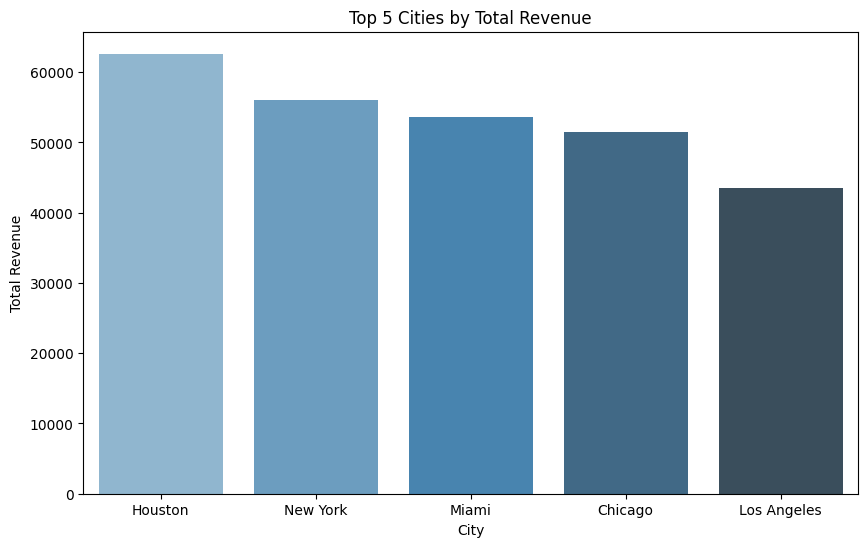

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='Revenue', data=top5, palette="Blues_d")
plt.title('Top 5 Cities by Total Revenue')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.show()